## Classic Activation Functions

### Step function

The step or threshold activation function is a simple activation function. In the year 1943 McCulloch & Pitts (https://link.springer.com/article/10.1007/BF02478259) introduced the original perceptron and used a step activation function like the following equation
 
$$
f(x) =
  \begin{cases}
    1       & \quad \text{if } x > \theta \\
    0       & \quad \text{if } x \leq \theta
  \end{cases} 
$$

This equation outputs a value of 1.0 for incoming values of $ \theta$ (threshold value) or higher and 0 for all other values. Step functions, also known as threshold functions, only return 1 (true) for values that are above the specified threshold, as seen in Figure bellow.

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]


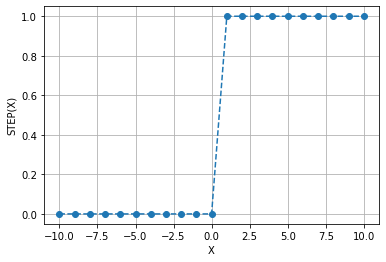

In [7]:
import matplotlib.pyplot as plt
import numpy as np
  
x = np.arange(-10, 11, 1)
print(x)
def plot_graph(y,ylabel):
    plt.figure()
    plt.plot(x,y, 'o--')
    plt.grid(True)
    plt.xlabel("X")
    plt.ylabel(ylabel)
    plt.show()
y = list(map(lambda n: 1 if n>0.5 else 0, x))
plot_graph(y,"STEP(X)")

### Sigmoid or Logistic Activation Function


The sigmoid non-linearity has the mathematical form as bellow.

$$ \sigma (x) =  \frac{1}{1 + e^ \left(-x \right)} $$ 

it takes a real-valued number and **squashes** it into range between __0 and 1__. Therefore, it is especially used for models where we have to predict the probability as an output. Since probability of anything exists only between the range of 0 and 1, sigmoid is the good choice.

In particular, large negative numbers become 0 and large positive numbers become 1. The sigmoid function has seen frequent use historically. The sigmoid non-linearity has recently fallen out of favor and it is rarely ever used - because of the following drawbacks:

- Vanishing gradient—for very high or very low values of X, there is almost no change to the prediction, causing a vanishing gradient problem. This can result in the network refusing to learn further, or being too slow to reach an accurate prediction.
- Outputs not zero centered.
- Computationally expensive


The Sigmoid Function curve looks like a S-shape.



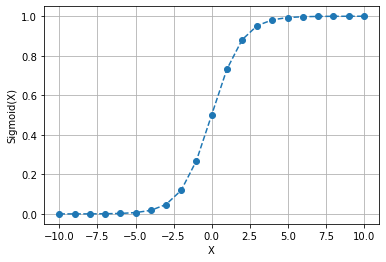

In [18]:
y = 1 / (1 + np.exp(-x))
plot_graph(y, "Sigmoid(X)")

### Tanh

The hyperbolic tangent function is also a prevalent activation function for neural networks that must output values in the range between __-1 and 1__. This activation function is simply the hyperbolic tangent (tanh) function, as shown in the following equation:

$$ 
\begin{split}
            tanh(x) & = \frac{e^x - e^{-x}}{e^x + e^{-x}} \\
                    & = \frac{e^{2x} - 1}{e^{2x} + 1}
\end{split}                  
$$


Like the sigmoid neuron, its activations saturate, but unlike the sigmoid neuron its output is zero-centered. Therefore, in practice the tanh non-linearity is always preferred to the sigmoid nonlinearity. Also note that the tanh neuron is simply a scaled sigmoid neuron, in particular the following holds: 

$$ tanh(x) = 2 \sigma \left( 2x \right) -1 $$

As for Sigmoid, Tanh is highly compute-intensive and suffers from saturation problem and thus vanishing gradient. In fact, when the neuron reaches the minimum or maximum value of its range, that respectively correspond to -1 and 1, its derivative is equal to 0.

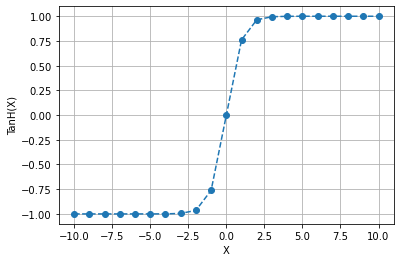

In [19]:
y = (np.exp(2*x) - 1) / (np.exp(2*x) + 1)
plot_graph(y, "TanH(X)")

### Rectified Linear Units (ReLU)

The rectified linear unit (ReLU) [[@teh2001rate]](https://www.cs.toronto.edu/~hinton/absps/nips00-ywt.pdf) was introduced by Teh & Hinton in 2001. The Rectified Linear Unit has become very popular in the last few years. The following equation shows the straightforward ReLU function:


$$ f(x) = max(0,x) $$

In other words, the activation is simply thresholded at zero

$$
f(x) =
  \begin{cases}
    x       & \quad \text{if } x \geq 0 \\
    0       & \quad \text{if } x < 0
  \end{cases} 
$$

There are several pros and cons to using the ReLUs:

- It was found to greatly accelerate (e.g. a factor of 6 [[@krizhevsky2012imagenet]](http://www.cs.toronto.edu/~fritz/absps/imagenet.pdf) ) the convergence of stochastic gradient descent compared to the sigmoid/tanh functions. It is argued that this is due to its linear, non-saturating form.

- Compared to tanh/sigmoid neurons that involve expensive operations (exponentials, etc.), the ReLU can be implemented by simply thresholding a matrix of activations at zero.

- But the issue is that all the negative values become zero immediately which decreases the ability of the model to fit or train from the data properly. That means any negative input given to the ReLU activation function turns the value into zero immediately in the graph, which in turns affects the resulting graph by not mapping the negative values appropriately.




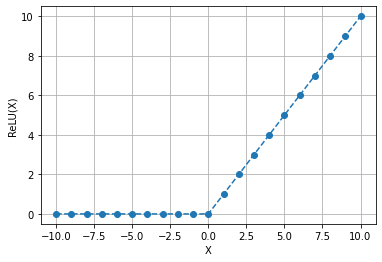

In [20]:
y = list(map(lambda a: a if a>=0 else 0, x))
plot_graph(y,"ReLU(X)")

### ELU Function
Neural networks employ the Exponential Linear Unit (ELU) activation function. It resembles the sigmoid and rectified linear unit (ReLU) functions but varies in several aspects.

ELU function definitions:

$$
f(x) =
  \begin{cases}
    x       & \quad \text{if } x > 0 \\
    ∝(e^x-1)       & \quad \text{if } x < 0
  \end{cases} 
$$

where alpha is usually 1. This function ensures a smooth transition from negative to positive integers. Although it provides a non-zero output for negative inputs, it is identical to the ReLU function for positive inputs, which may assist avoid the generation of "dead" neurons in the neural network.


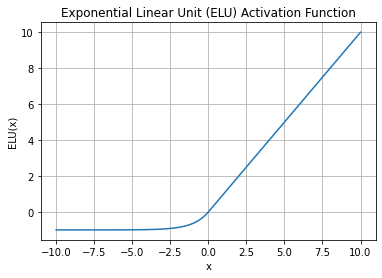

In [13]:
x = np.linspace(-10, 10, 100)
plt.plot(x, np.where(x > 0, x, 1.0 * (np.exp(x) - 1)))
plt.grid(True)
plt.xlabel("x")
plt.ylabel("ELU(x)")
plt.title("Exponential Linear Unit (ELU) Activation Function")
plt.show()

### Selu Function

The Scaled Exponential Linear Unit (SELU) function is an activation function used in deep neural networks. This particular form of activation function is employed during neural network training. It is a variation of the exponential linear unit (ELU) function, and Klambauer and colleagues originally described it in a paper they published in 2017.

The SELU function is explained as follows:

$$ f(x) = \lambda
  \begin{cases}
    x       & \quad \text{if } x \geq 0 \\
    \alpha(e^x -1)       & \quad \text{if } x < 0
  \end{cases} $$
  
In this equation, scale is a normalization constant that fluctuates based on the input distribution of the activation function, and alpha is a minor positive constant that is commonly fixed at 1.67326 and another constant gama which is fixed at 1.0507. The normalization constant, which is produced by setting the mean and variance of the input to zero and one, respectively, is used to stabilize the network's output while it is being trained.

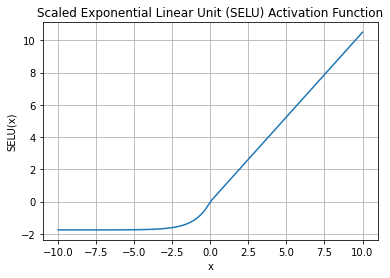

In [12]:
x = np.linspace(-10, 10, 100)
plt.plot(x, 1.0507 * np.where(x > 0, x, 1.67326 * (np.exp(x) - 1)))
plt.grid(True)
plt.xlabel("x")
plt.ylabel("SELU(x)")
plt.title("Scaled Exponential Linear Unit (SELU) Activation Function")
plt.show()